In [27]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df = sns.load_dataset('iris')

In [29]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [31]:
df = df[['sepal_length','petal_length','species']]

In [32]:
df

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [33]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [34]:
X

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [35]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [36]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [37]:
clf = LogisticRegression(multi_class='multinomial') # for softmax it is generally multinomial regression.

In [38]:
clf.fit(X_train,Y_train)

LogisticRegression(multi_class='multinomial')

In [39]:
Y_pred = clf.predict(X_test)

In [40]:
print(accuracy_score(Y_test,Y_pred))

0.9666666666666667


In [41]:
confusion_matrix(Y_test,Y_pred)

array([[14,  0,  0],
       [ 0,  7,  1],
       [ 0,  0,  8]])

In [42]:
# Prediction {New query Point}
query = np.array([[3.4,2.7]]) # 3.4 = sepal_length,petal_length

In [43]:
clf.predict_proba(query) # it will provide the probalility of each class.
#[pro of satosa,prob of versical, prob of varginica] all add to 1

/home/jatin/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[7.25957888e-01, 2.73627865e-01, 4.14246954e-04]])

In [44]:
clf.predict(query)  # satosa

/home/jatin/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [49]:

from mlxtend.plotting import plot_decision_regions
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))
clf.fit(X, Y)
ax = plt.subplot(gs[0, grd[1]])
fig = plot_decision_regions(X=X, y=Y,clf=clf, legend=2)
plt.title('Softmax_Regression')

plt.show()


NameError: name 'gs' is not defined

In [58]:
X = X.to_numpy(dtype='float')
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.4],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [60]:
Y = Y.to_numpy(dtype=int)

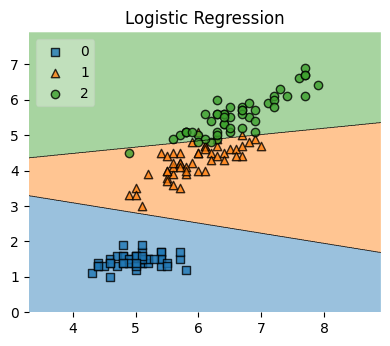

In [61]:
import matplotlib.gridspec as gridspec
import itertools
clf1 = LogisticRegression(random_state=0)

# Plotting Decision Regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['Logistic Regression']

for clf, lab, grd in zip([clf1,],labels,itertools.product([0, 1],repeat=2)):
    clf.fit(X, Y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=Y,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()